# Customer Travel analysis

In [1]:
import pandas as pd
import numpy as np

In [41]:
CustomerTravel=pd.read_csv("Customertravel.csv")
CustomerTravel

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0
...,...,...,...,...,...,...,...
949,31,Yes,Low Income,1,No,No,0
950,30,No,Middle Income,5,No,Yes,0
951,37,No,Middle Income,4,No,No,0
952,30,No,Low Income,1,Yes,Yes,0


# Data cleaning

In [42]:
CustomerTravel.dropna()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0
...,...,...,...,...,...,...,...
949,31,Yes,Low Income,1,No,No,0
950,30,No,Middle Income,5,No,Yes,0
951,37,No,Middle Income,4,No,No,0
952,30,No,Low Income,1,Yes,Yes,0


In [43]:
CustomerTravel=CustomerTravel.drop_duplicates()
CustomerTravel

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0
...,...,...,...,...,...,...,...
932,29,No,Low Income,3,Yes,No,0
936,36,No Record,Middle Income,1,Yes,Yes,0
940,27,No,Low Income,1,No,Yes,0
947,38,No Record,Middle Income,2,Yes,No,0


In [44]:
CustomerTravel.dtypes

Age                            int64
FrequentFlyer                 object
AnnualIncomeClass             object
ServicesOpted                  int64
AccountSyncedToSocialMedia    object
BookedHotelOrNot              object
Target                         int64
dtype: object

##### Target=churn
- 0=No
- 1=Yes

In [82]:
CustomerTravel=CustomerTravel.rename(columns={"Target":"Churn"})
CustomerTravel

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Churn,Age_group
0,34,No,Middle Income,6,No,Yes,0,30 to 35
1,34,Yes,Low Income,5,Yes,No,1,30 to 35
2,37,No,Middle Income,3,Yes,No,0,36 to 40
3,30,No,Middle Income,2,No,No,0,30 to 35
4,30,No,Low Income,1,No,No,0,30 to 35
...,...,...,...,...,...,...,...,...
932,29,No,Low Income,3,Yes,No,0,25 to 29
936,36,No Record,Middle Income,1,Yes,Yes,0,36 to 40
940,27,No,Low Income,1,No,Yes,0,25 to 29
947,38,No Record,Middle Income,2,Yes,No,0,36 to 40


# Demographic Analysis

In [46]:
Average_Age=round(CustomerTravel["Age"].mean())
Average_Age

32

In [47]:
CustomerTravel['Age'].max()

38

In [56]:
CustomerTravel['Age'].min()

27

In [116]:
Age_group=round(CustomerTravel['Age_group'].value_counts(normalize=True)*100,1)
Age_group

Age_group
30 to 35    49.9
25 to 29    26.4
36 to 40    23.7
Name: proportion, dtype: float64

<Axes: title={'center': 'Customer Age Group'}, ylabel='proportion'>

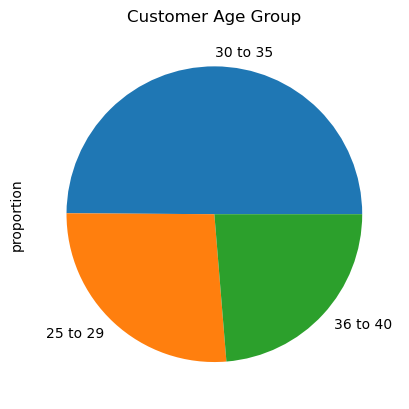

In [118]:
Age_group.plot.pie(y='Age_group',title="Customer Age Group")

In [81]:
round(CustomerTravel['AnnualIncomeClass'].value_counts(normalize=True)*100,1)

AnnualIncomeClass
Low Income       45.9
Middle Income    38.7
High Income      15.4
Name: proportion, dtype: float64

# Churn Analysis

In [62]:
Percentage_Churn=round(CustomerTravel['Churn'].value_counts(normalize=True)*100)  # % 0f churn or not
Percentage_Churn

Churn
0    73.0
1    27.0
Name: proportion, dtype: float64

In [69]:
print('Percentage churn = 27%')

Percentage churn = 27%


In [66]:
CustomerTravel.loc[CustomerTravel['Age'] <=29, 'Age_group'] = '25 to 29'   # age grouping
CustomerTravel.loc[CustomerTravel['Age'] >=35, 'Age_group'] = '30 to 35'
CustomerTravel.loc[CustomerTravel['Age'] >35, 'Age_group'] = '36 to 40'
print(CustomerTravel)

     Age FrequentFlyer AnnualIncomeClass  ServicesOpted  \
0     34            No     Middle Income              6   
1     34           Yes        Low Income              5   
2     37            No     Middle Income              3   
3     30            No     Middle Income              2   
4     30            No        Low Income              1   
..   ...           ...               ...            ...   
932   29            No        Low Income              3   
936   36     No Record     Middle Income              1   
940   27            No        Low Income              1   
947   38     No Record     Middle Income              2   
950   30            No     Middle Income              5   

    AccountSyncedToSocialMedia BookedHotelOrNot  Churn Age_group  
0                           No              Yes      0  30 to 35  
1                          Yes               No      1  30 to 35  
2                          Yes               No      0  36 to 40  
3                      

In [67]:
CustomerTravel.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Churn,Age_group
0,34,No,Middle Income,6,No,Yes,0,30 to 35
1,34,Yes,Low Income,5,Yes,No,1,30 to 35
2,37,No,Middle Income,3,Yes,No,0,36 to 40
3,30,No,Middle Income,2,No,No,0,30 to 35
4,30,No,Low Income,1,No,No,0,30 to 35


##### Age group by acct sync to social media

In [89]:
AgeGroup_by_AcctSync=round(CustomerTravel.groupby('Age_group')
      ['AccountSyncedToSocialMedia'].value_counts(normalize=True)*100,1)
AgeGroup_by_AcctSync

Age_group  AccountSyncedToSocialMedia
25 to 29   No                            61.9
           Yes                           38.1
30 to 35   No                            57.0
           Yes                           43.0
36 to 40   No                            57.5
           Yes                           42.5
Name: proportion, dtype: float64

### Churn
- 0=NO
- 1=YES

##### % of customers that booked hotel ( churn or not)

In [91]:
Hotel_by_churn=round(CustomerTravel.groupby('BookedHotelOrNot')
                     ['Churn'].value_counts(normalize=True)*100,1)
Hotel_by_churn

BookedHotelOrNot  Churn
No                0        66.3
                  1        33.7
Yes               0        81.5
                  1        18.5
Name: proportion, dtype: float64

##### % of income class churn or not

In [92]:
IncomeClass_by_churn=round(CustomerTravel.groupby('AnnualIncomeClass')
                           ['Churn'].value_counts(normalize=True)*100,1)
IncomeClass_by_churn

AnnualIncomeClass  Churn
High Income        1        58.0
                   0        42.0
Low Income         0        68.8
                   1        31.2
Middle Income      0        89.6
                   1        10.4
Name: proportion, dtype: float64

##### % of customer in various income class that booked hotel or not

In [93]:
IncomeClass_by_Hotel=round(CustomerTravel.groupby('AnnualIncomeClass')
      ['BookedHotelOrNot'].value_counts(normalize=True)*100,1)
IncomeClass_by_Hotel

AnnualIncomeClass  BookedHotelOrNot
High Income        No                  75.4
                   Yes                 24.6
Low Income         No                  62.0
                   Yes                 38.0
Middle Income      Yes                 54.3
                   No                  45.7
Name: proportion, dtype: float64

##### frequent flyer that churn or not

In [94]:
frequentFlyer_by_churn=round(CustomerTravel.groupby('FrequentFlyer')
                     ['Churn'].value_counts(normalize=True)*100,1)
frequentFlyer_by_churn

FrequentFlyer  Churn
No             0        84.4
               1        15.6
No Record      0        84.9
               1        15.1
Yes            1        52.1
               0        47.9
Name: proportion, dtype: float64

In [86]:
import matplotlib.pyplot as plt

In [97]:
CustomerTravel

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Churn,Age_group
0,34,No,Middle Income,6,No,Yes,0,30 to 35
1,34,Yes,Low Income,5,Yes,No,1,30 to 35
2,37,No,Middle Income,3,Yes,No,0,36 to 40
3,30,No,Middle Income,2,No,No,0,30 to 35
4,30,No,Low Income,1,No,No,0,30 to 35
...,...,...,...,...,...,...,...,...
932,29,No,Low Income,3,Yes,No,0,25 to 29
936,36,No Record,Middle Income,1,Yes,Yes,0,36 to 40
940,27,No,Low Income,1,No,Yes,0,25 to 29
947,38,No Record,Middle Income,2,Yes,No,0,36 to 40


In [114]:
FrequentFlyer=round(pd.crosstab(index=CustomerTravel['FrequentFlyer'],
            columns=[CustomerTravel['BookedHotelOrNot']],
            values=CustomerTravel['Churn'],aggfunc='value_counts',normalize=True)*100,1)
FrequentFlyer

BookedHotelOrNot           No   Yes
FrequentFlyer __dummy__            
No            0          22.6  24.6
              1           6.0   2.7
No Record     0           5.4   4.7
              1           1.3   0.4
Yes           0          10.3   5.1
              1          12.1   4.7